In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # seaborn package for visualising
import plotly.express as px # plotly visualisation
import time
import matplotlib.pyplot as plt
from fastai.tabular import * 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [2]:
path = ('/kaggle/input/coronavirus-2019ncov/covid-19-all.csv')
path

'/kaggle/input/coronavirus-2019ncov/covid-19-all.csv'

In [3]:
whole_data_path='/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv'
covid_19_data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")
time_series_covid_19_Confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
time_series_covid_19_Deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
time_series_covid_19_Recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

corona_data=pd.read_csv(whole_data_path)

In [4]:
corona_data.shape
#recovered_data.shape
#deaths_data.shape
#confirmed_data.shape
#Total no. of rows|

(6162, 8)

In [5]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
SNo                6162 non-null int64
ObservationDate    6162 non-null object
Province/State     3700 non-null object
Country/Region     6162 non-null object
Last Update        6162 non-null object
Confirmed          6162 non-null float64
Deaths             6162 non-null float64
Recovered          6162 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 385.2+ KB


In [6]:
if 'Last Update' in corona_data.columns :
    corona_data=corona_data.drop('Last Update',axis=1)
elif  'Sno' in corona_data.columns:
    corona_data=corona_data.drop('Sno',axis=1)
    
corona_data["ObservationDate"] = corona_data['ObservationDate'].astype('datetime64')
#corona_data["date"] = corona_data['date'].astype('datetime64')

corona_data["Confirmed"] = corona_data['Confirmed'].astype('float64')
corona_data["Deaths"] = corona_data['Deaths'].astype('float64')
corona_data["Recovered"] = corona_data['Recovered'].astype('float64')

#print('Minimum date collected - ',min(corona_data["Date"]))
#print('Maximum date collected - ',max(corona_data["Date"]))

#corona_data=corona_data.rename(columns={"date": "ObservationDate","Province/State":"Country"})

In [7]:
print('Total no. of confirmed cases over these days',sum(corona_data['Confirmed']))
print('Total no. of deaths over these days',sum(corona_data['Deaths']))
print('Total no. of recovered cases over these days',sum(corona_data['Recovered']))


print('Mortality Rate', sum(corona_data['Deaths'])/sum(corona_data['Confirmed']))

Total no. of confirmed cases over these days 3629156.0
Total no. of deaths over these days 116833.0
Total no. of recovered cases over these days 1357313.0
Mortality Rate 0.032192884516399956


In [8]:
corona_data_date=pd.DataFrame(corona_data.groupby(by='ObservationDate').sum())
if 'Sno' in corona_data_date.columns:
    corona_data_date=corona_data_date.drop('Sno',axis=1)
corona_data_date['ObservationDate']=corona_data_date.index
corona_data_date.Date=corona_data_date.Date.apply(lambda x:x.date())

AttributeError: 'DataFrame' object has no attribute 'Date'

In [9]:
melted_data=pd.melt(corona_data_date,id_vars=['ObservationDate'])

In [10]:
def bar_plot(column_name):
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=90)
    plt.xlabel('ObservationDate', fontsize=18)
    plot_1=sns.barplot(x='ObservationDate',y=column_name,data=corona_data_date)
    plot_1

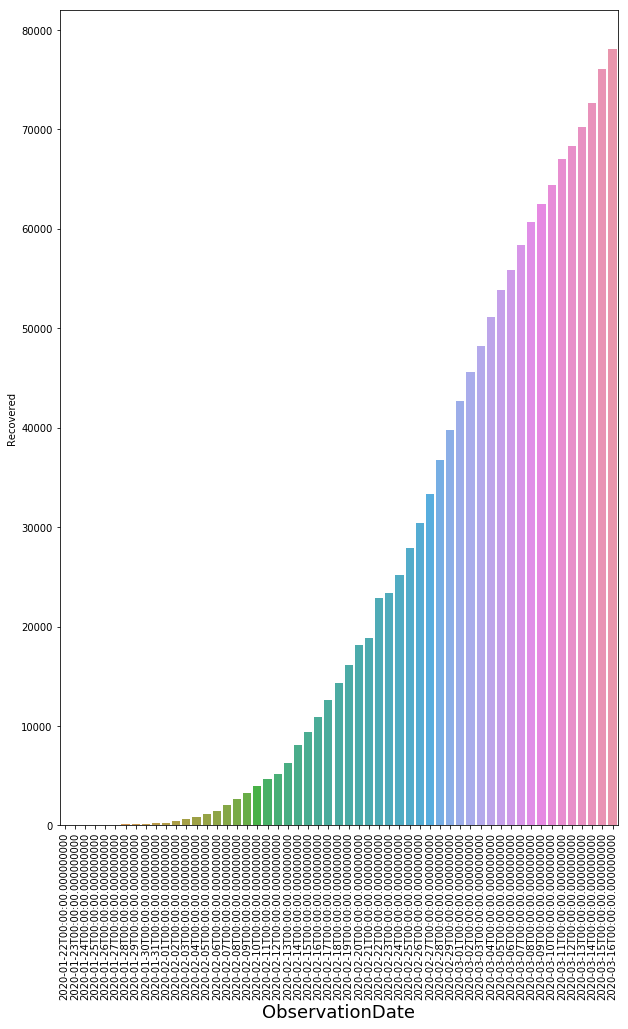

In [11]:
bar_plot('Recovered')

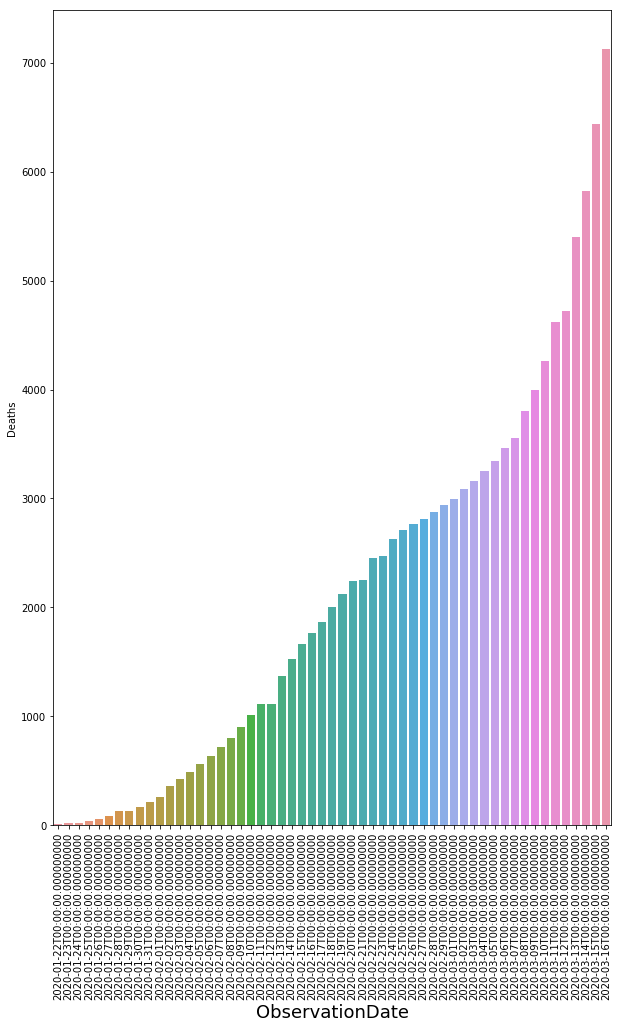

In [12]:
bar_plot('Deaths')

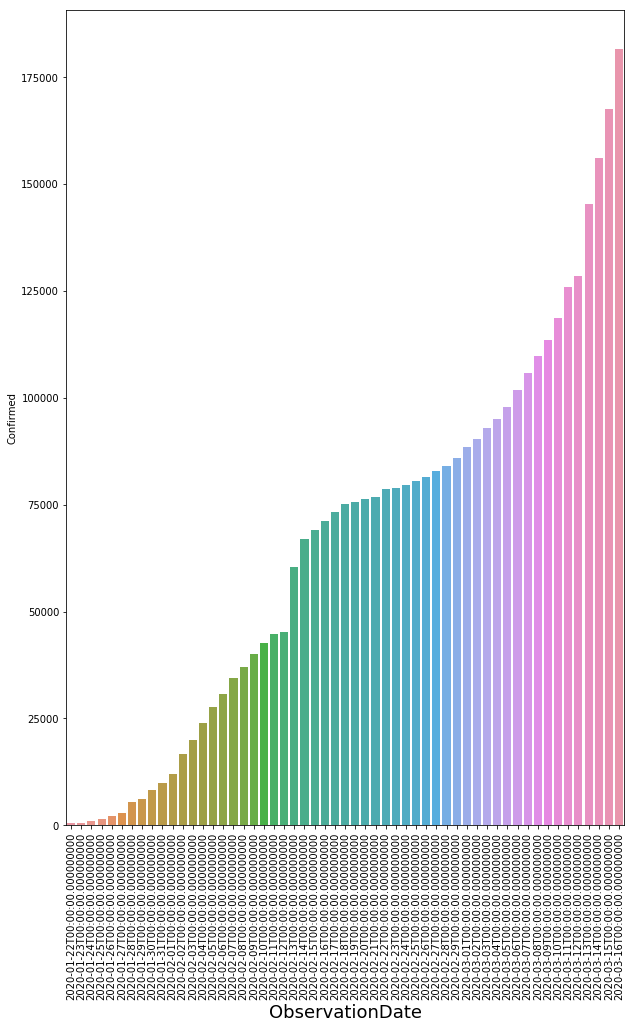

In [13]:
bar_plot('Confirmed')

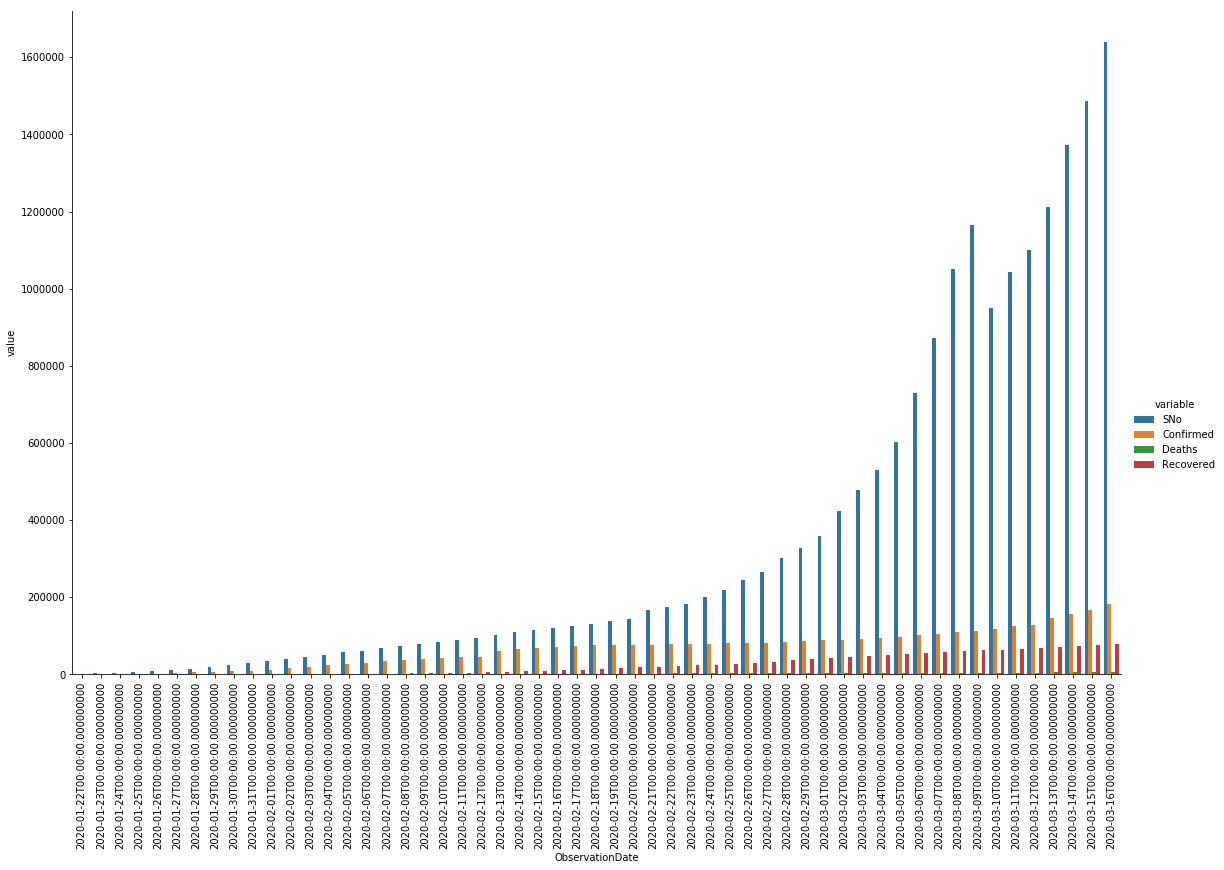

In [14]:
hm=sns.catplot(x='ObservationDate', y='value', hue='variable', data=melted_data, kind='bar',height=10,aspect =1.6,legend=True)
hm.set_xticklabels( rotation=90)

In [15]:
import plotly.express as px
fig = px.line(melted_data, x="ObservationDate",y='value', color='variable')
fig.show()

In [16]:
corona_data_country=pd.DataFrame(corona_data.groupby(by='Country').sum())
if 'Sno' in corona_data_country:
    corona_data_country=corona_data_country.drop('Sno',axis=1)
corona_data_country['country']=corona_data_country.index

KeyError: 'Country'

In [17]:
corona_data_country.sort_values(['Confirmed','Deaths','Recovered'],ascending=[False,False,False])

NameError: name 'corona_data_country' is not defined